# Notes

Exam contains 6 problems, Most of them are of intermediate complexity and follow the material from class or graded assignments. Note, that no loops are allowed in this exam, and all the solutions containing loops will be graded as 0.

For this exam you'll need [Titanic](https://www.kaggle.com/c/titanic) and [road accidents](https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales) datasets.

In [1]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams["figure.figsize"] = (6,6)

In [3]:
import numpy as np
import pandas as pd
import torch

In [4]:
STUDENT = "Samuel Guedj"
ASSIGNMENT = "exam"
TEST = False

In [ ]:
if TEST:
    import solutions
    total_grade = 0
    MAX_POINTS = 10

# NumPy

### 1. Filtering array (2 points).

Clip array values according to the following:

- given a two-dimensional array `arr` and threshold value `max_val`,
- find those rows, for which row values sum is `> max_val`,
- and replace largest value for each of those rows with `v` $\rightarrow$ `v - <row sum> + max_val`.

For example, consider the following array and threshold `max_val=8`:

In [5]:
a = np.array([[1, 5, 4], [-3, 2, 8]])
a

array([[ 1,  5,  4],
       [-3,  2,  8]])

Row sums are:

In [6]:
a.sum(axis=1)

array([10,  7])

Since row sum for row `0` is `> max_val`, largest value in that row (`a[0, 1]`, which is `5`), must be replaced with: `5 - 10 + 8 = 3`, resulting in:

In [8]:
a_clipped = np.array([[1, 3, 4], [-3, 2, 8]])
a_clipped

array([[ 1,  3,  4],
       [-3,  2,  8]])

#### Notes:

- **do not change original array**,
- in this problem you may need to use **boolean and fancy indexing**, as well as `arr.argmax(...)`,
- you **cannot use loops**,
- input array is of **any two-dimensional shape** (including `(N,1)` and `(1,N)`), filled with **random integers**,
- there may be no rows, which satisfy threshold condition, and in that case resulting array must be identical to input array.

In [53]:
def clip_array(arr, max_val):
    ret = np.array(arr)
    retsum = ret.sum(axis=1)
    row = np.where(retsum > max_val)
    col = ret[row].argmax(axis=1)
    retmax = ret[row].max(axis=1)   
    ret[row, col] = retmax - retsum[row] + max_val
    return ret

b = clip_array(a, 8)
print("***")
print(a)
print("result")
print(b)

***
[[ 1  5  4]
 [-3  2  8]]
result
[[ 1  3  4]
 [-3  2  8]]


In [ ]:
PROBLEM_ID = 1

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, clip_array)

### 2. Calculate area (1 point).

In this problem you will construct a naive Monte-Carlo simulator. Provided with a 2D bounding box, you must calculate it's area:

- a bounding box is specified by maximum and minimum `x` and `y`, i.e. a bounding box is a **rectangle** between `minx` and `maxx` over `x`-axis and between `miny` and `maxy` over `y`-axis,
- all of `minx`, `maxx`, `miny`, `maxy` are `>=0` and `<=1`,
- you can sample **at most** `n_samples` points on 2D place,
- ratio of number of points inside a bounding box to total number of points is an **estimate of bounding box area**,
- estimate is considered valid, if it's **no more than 10% off of actual area value**,
- `n_samples` is chosen in such a way, that **10% error is achievable nearly always**, i.e. chances of getting more then 10% error with correct computation are negligibly small.

For example, a bounding box is `minx=0.25`, `maxx=0.5`, `miny=0.1`, `maxy=0.6`. Actual area is `0.125`. Suppose, that we sample `10000` points in unit square $x \in [0, 1],\,y \in [0, 1]$ and 1215 of them are inside the bounding box. Then, an estimate for the bounding box area is `0.1215` (with error of about 2.8%). Image below illustrates this example.

![Monte-Carlo integration example](mc.png)

In [183]:
def calc_area(minx, maxx, miny, maxy, n_samples):
    """Calculate area of bounding box."""
    x = np.random.rand(n_samples)
    y = np.random.rand(n_samples)
 #   area = (minx <= x <= maxx) & (miny <= y <= maxy)
    area = (minx <= x) & (x <= maxx) & (miny <= y) & (y <= maxy)
    return area.mean()
 
a = calc_area(0.25, 0.5, 0.1, 0.6, 10000)
print("area:{}".format(a))

area:0.1226


In [ ]:
PROBLEM_ID = 2

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, calc_area)

### 3. Find outliers (3 points).

Given an array of shape `(N,2)`, filter all the rows, which are more than `thr` away from other rows. Distance metrics is Euclidean, i.e. distance between rows `i` and `j` is (in pseudocode):

```
distance(i, j) = sqrt(square(arr[i, 0] - arr[j, 0]) + square(arr[i, 1] - arr[j, 1]))
```

Distance of row `i` from other rows is:

```
distance(i) = mean(distance(i, j)), j!=i
```

Rows, which have `distance(i) > thr` must be filtered. In this problem you **cannot use loops**. Instead, use broadcasting (recall recurrence matrix problem in GA-2 and extend it to two-dimensional case).

As an example, consider 1000 samples from standard normal distribution for `x` (axis 1) and `y` (axis 0) and threshold of 2:

![Outliers filtering](outliers.png)

In [211]:

def find_outliers(arr, thr):
    """Find outliers."""
    arr2 = np.expand_dims(arr, 1)
    sq = np.square(arr2 - arr)
    sum_sqrs = np.sum(sq, axis=2)
    dists = np.sqrt(sum_sqrs) 
    mean_dists = np.sum(dists, axis=0) / (dists.shape[0] - 1)
    xcore = np.where(mean_dists <= thr)
    return arr[xcore]

In [219]:
n = 1000
thr = 2
mat = np.hstack((np.random.normal(size=n), np.random.normal(size=n))).reshape(n,2)
#mat = np.vstack((np.random.normal(size=n), np.random.normal(size=n)))#.reshape(n,2)



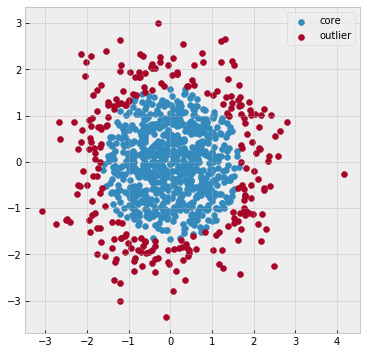

In [220]:
def plot_outsider(arr, core):
    outlier_view = np.isin(arr, core, invert=True)
    outlier = arr[outlier_view]
    #print(outlier_x)
    outlier = outlier.reshape(-1, 2)
    plt.scatter(core.T[0], core.T[1], label="core")
    plt.scatter(outlier.T[0], outlier.T[1], label="outlier")
    plt.legend()
    

core = find_outliers(mat, thr)
plot_outsider(mat, core)


In [ ]:
PROBLEM_ID = 3

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, find_outliers)

# PyTorch

### 4. SImple derivative (1 point).

Given some value of `x0`, calculate a derivative of sigmoid function at that point. Input is a single floating point value. Output must also be a single floating point value (not a tensor!) equal to derivative of $\sigma(x)$ at `x0`.

Do not use exact formula, but use PyTorch `.backward()`.

In [190]:
def d_sigmoid(x0):
    """Derivative of sigmoid."""
    x_grad = torch.tensor(x0, dtype=torch.float, requires_grad=True)
    sg = torch.sigmoid(x_grad)
    sg.backward()
    return x_grad.grad.item()

In [192]:
d_sigmoid(1.0)

0.1966119259595871

In [ ]:
PROBLEM_ID = 4

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, d_sigmoid)

# Pandas

### 5. Ratio of males travelling alone per class (1 point).

Given the Titanic dataset, calculate ratio of males travelling alove (`SipSp==0` and `Parch==0`) per class. In other words, calculate number of males travelling alone in each class, divided by number of passengers in that class.

Input is indexed with `PassengerId` and is a concatenation of train and test sets. Output must be a series, indexed by class, containing the requested ratios.

In [116]:
tr = pd.read_csv("data/train.csv", index_col="PassengerId")
tt = pd.read_csv("data/test.csv", index_col="PassengerId")
df = pd.concat([tr, tt], sort=False)
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [197]:
def lone_males(df):
    """Calculate ratio of males travelling alone per class."""
    lone_males = df[(df['Sex']=='male') & (df['Parch']==0) & (df['SibSp']==0)]['Pclass'].value_counts()
    all_p = df['Pclass'].value_counts()
    return lone_males / all_p



lone_males(df)

1    0.334365
2    0.418773
3    0.524683
Name: Pclass, dtype: float64

In [ ]:
PROBLEM_ID = 5

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, lone_males)

### 6. Worst days on UK roads in 2005 (2 points).

Calculate Top-5 days with the largest number of severe accidents (`Accident_Severity < 3`).

Input is a **dataframe**, containing all the accidents in 2005 and the following columns: `date_time` (constructed the same way, as in class) and `Accident_Severity`. Index is a default integer index. Result must be a list (or tuple) of dates (as a `pd.Timestamp`) with 5 elements.

In [131]:
dfa = pd.read_csv("data/accidents_2005_to_2007.csv")
dfa.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [140]:
dfa.loc[:, 'dt'] = dfa.Date.str.cat(dfa.Time, sep=' ', na_rep='00:00')
dfa.loc[:, 'date_time'] = pd.to_datetime(dfa.dt, dayfirst=True)

In [141]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570011 entries, 0 to 570010
Data columns (total 35 columns):
Accident_Index                                 570011 non-null object
Location_Easting_OSGR                          569910 non-null float64
Location_Northing_OSGR                         569910 non-null float64
Longitude                                      569910 non-null float64
Latitude                                       569910 non-null float64
Police_Force                                   570011 non-null int64
Accident_Severity                              570011 non-null int64
Number_of_Vehicles                             570011 non-null int64
Number_of_Casualties                           570011 non-null int64
Date                                           570011 non-null object
Day_of_Week                                    570011 non-null int64
Time                                           569944 non-null object
Local_Authority_(District)                     570

In [155]:
dfa.drop([c for c in dfa.columns if c not in ['date_time', 'Accident_Severity']], axis=1, inplace=True)
dfa = dfa[dfa['date_time'].dt.year == 2005].copy()
dfa['Datetime_field'] = dfa['date_time']
dfa.set_index('date_time', inplace=True)

In [157]:
dfa.head()

,Accident_Severity,Datetime_field
date_time,,
2005-01-04 17:42:00,2,2005-01-04 17:42:00
2005-01-05 17:36:00,3,2005-01-05 17:36:00
2005-01-06 00:15:00,3,2005-01-06 00:15:00
2005-01-07 10:35:00,3,2005-01-07 10:35:00
2005-01-10 21:13:00,3,2005-01-10 21:13:00


In [163]:
def worst_days(df):
    """Calculate Top 5 most severe days."""
    return dfa[dfa['Accident_Severity']<3].resample('D').size().sort_values(ascending=False)[:5].index.to_list()

#print(dfa['Date','Time'])
#dfa.info()
worst_days(dfa)

[Timestamp('2005-05-14 00:00:00'),
 Timestamp('2005-06-18 00:00:00'),
 Timestamp('2005-09-16 00:00:00'),
 Timestamp('2005-11-04 00:00:00'),
 Timestamp('2005-12-23 00:00:00')]

In [ ]:
PROBLEM_ID = 6

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, worst_days)

In [ ]:
if TEST:
    print(f"{STUDENT}: {int(100 * total_grade / MAX_POINTS)}")